In [384]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

from scipy.fftpack import fft,fftshift,ifft

In [2]:
main_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/"

In [45]:
red_resp = np.load(os.path.join(main_path, 'red', 'responses_20.npy'))

In [46]:
red_resp.shape

(2000, 1500)

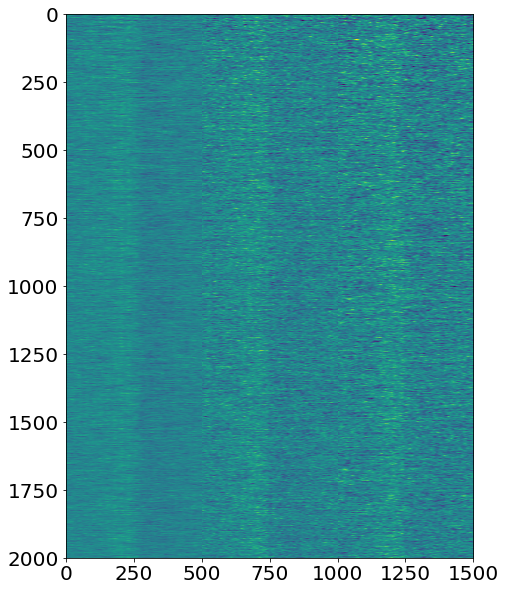

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(red_resp)

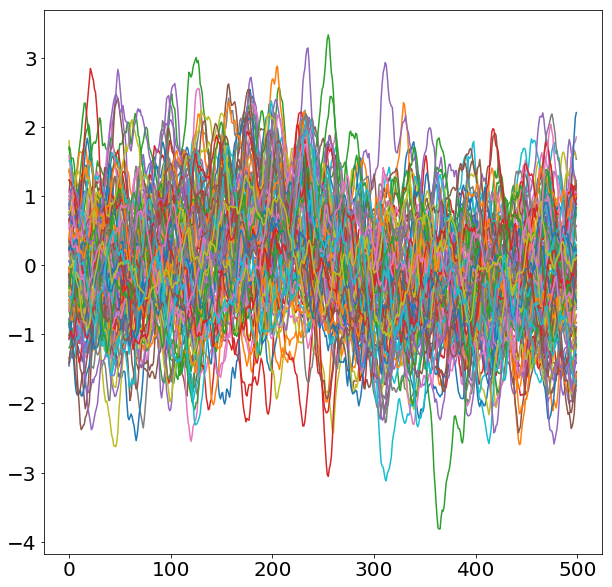

In [56]:
plt.figure(figsize=(10,10))
plt.plot(red_resp[:100,:500].T);

In [325]:
artifact_remove = (np.roll(artifact[:500],1)*200)

In [327]:
artifact_remove.shape

(500,)

In [326]:
responses[20,5:10,:500].shape

(5, 500)

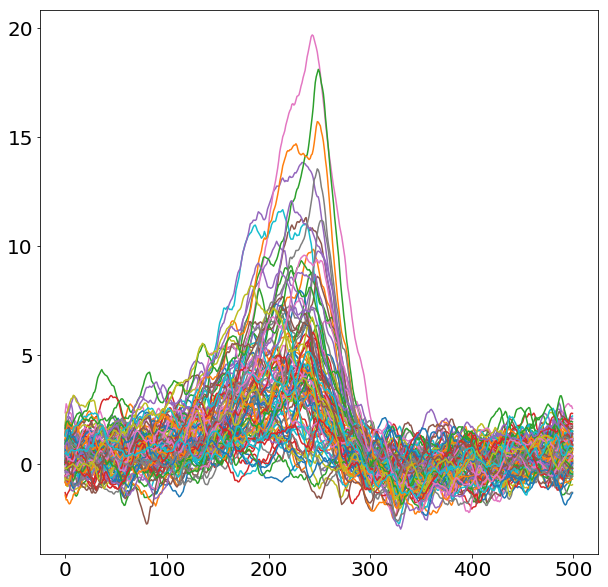

In [329]:
plt.figure(figsize=(10,10))
#plt.plot(responses[20,5:10,:500].T);
plt.plot(np.divide(responses[20,:100,:500],artifact_remove).T);

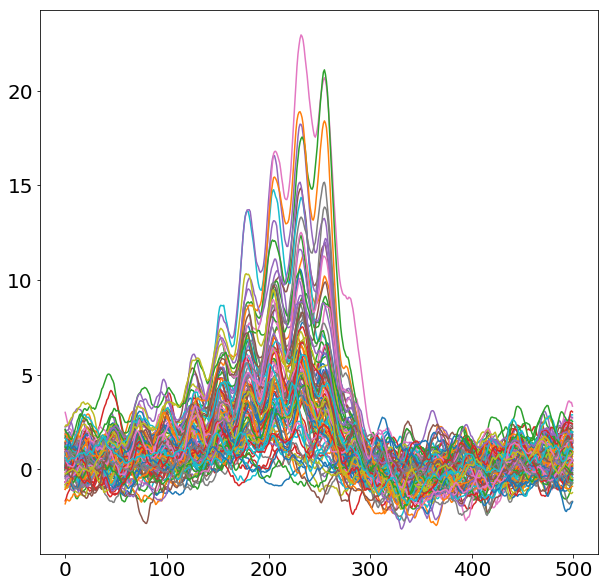

In [330]:
plt.figure(figsize=(10,10))
#plt.plot(responses[20,5:10,:500].T);
plt.plot(responses[20,:100,:500].T);

In [27]:
corrupted = np.mean(responses,axis=1)[20,:]

In [28]:
corrupted.shape, artifact.shape

((1500,), (1500,))

In [ ]:
plt.plot()

(0, 500)

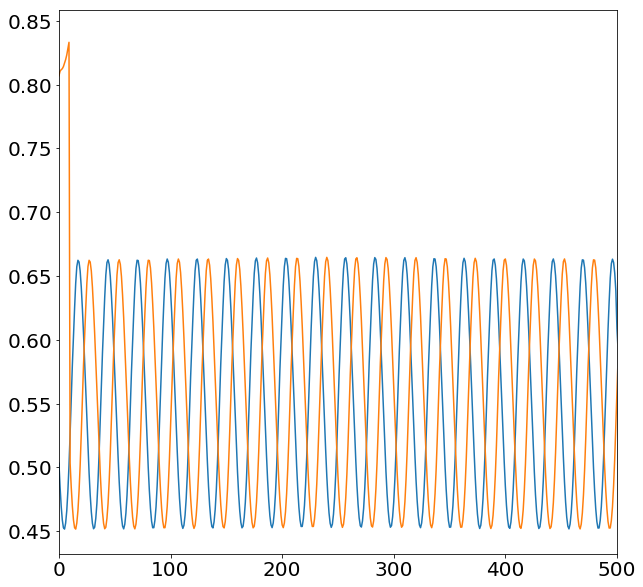

In [297]:
plt.figure(figsize=(10,10))
plt.plot(artifact*100)
plt.plot(np.roll(artifact,10)*100)

plt.xlim(0,500)

In [491]:
z=20
artifact = np.mean(X[z,:,:,:],axis=(0,2))
corrupted = np.mean(responses,axis=1)[z,:]

(0, 500)

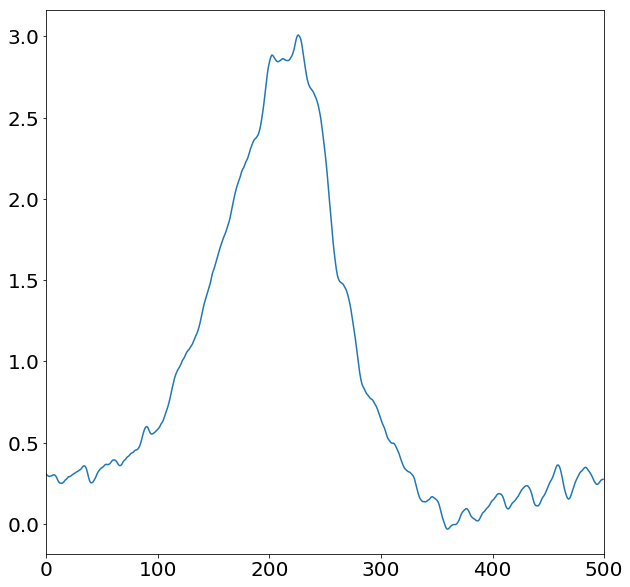

In [367]:
plt.figure(figsize=(10,10))
plt.plot(corrupted[500:1000]/(np.roll(artifact[500:1000],3)*200))

plt.xlim(0,500)

(0, 500)

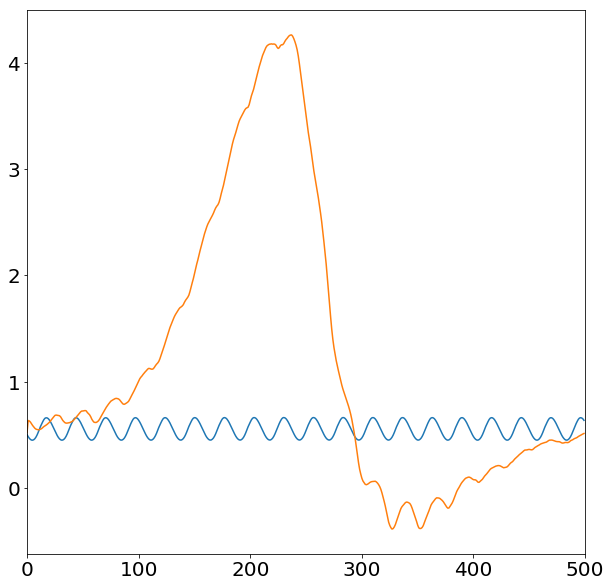

In [320]:
plt.figure(figsize=(10,10))
#plt.plot(corrupted[:500])
plt.plot(artifact[:500]*100)

#plt.plot(corrupted[:500]/(np.roll(artifact[:500],2)*200))
plt.plot(corrupted[:500]/(np.roll(artifact[:500],1)*200))
#plt.plot((corrupted[:500]-1)/(np.roll(artifact[:500],1)*200))

#plt.plot((corrupted[:500]-artifact[:500]*100)/(np.roll(artifact[:500],1)*200))

plt.xlim(0,500)

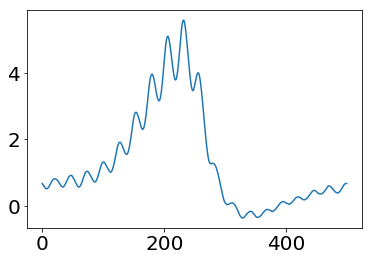

In [492]:
plt.plot(corrupted[:500])

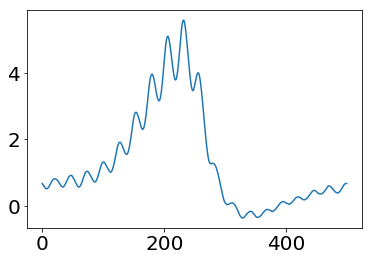

In [103]:
plt.plot(corrupted[:500])

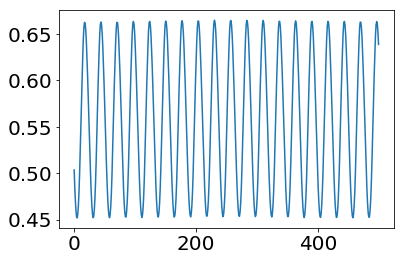

In [139]:
plt.plot(artifact[:500]*100)

In [289]:
out1 = scipy.signal.deconvolve(corrupted[:500], artifact[:10]+1)

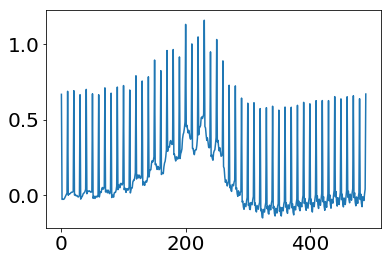

In [290]:
plt.plot(out1[0])

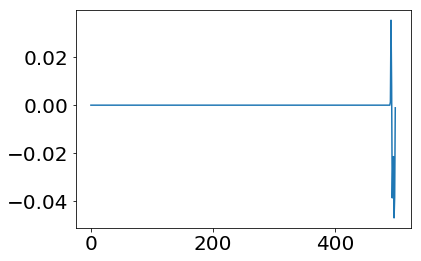

In [291]:
plt.plot(out1[1])
#plt.axvline(250)

In [150]:
out1 = scipy.signal.deconvolve(corrupted[:500], artifact[:500])
out2 = scipy.signal.deconvolve(out1[1], artifact[:500])

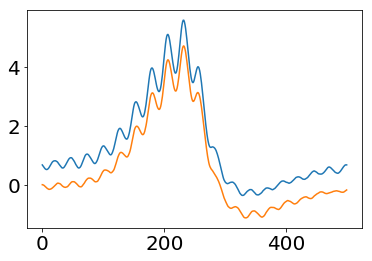

In [170]:
plt.plot(corrupted[:500])
plt.plot(out1[1])

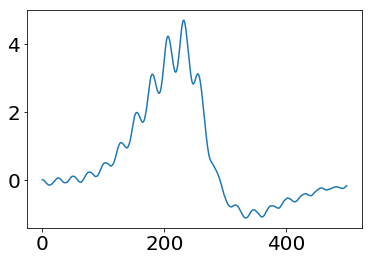

In [152]:
plt.plot(out2[1])

In [17]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/master_X.npy"
X = np.load(file)

In [18]:
X.shape

(49, 10, 1500, 3384)

In [26]:
artifact = np.mean(X[20,:,:,:],axis=(0,2))

(200, 300)

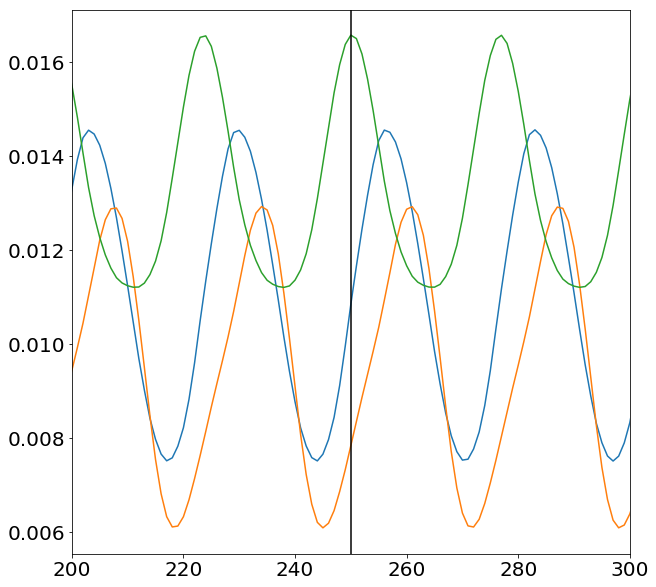

In [56]:
plt.figure(figsize=(10,10))

# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[:500])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[500:1000])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[1000:1500])

plt.plot(np.mean(X[20,0,:,:],axis=(1))[:500])
plt.plot(np.mean(X[20,0,:,:],axis=(1))[500:1000])
plt.plot(np.mean(X[20,0,:,:],axis=(1))[1000:1500])

plt.axvline(250,color='k')
plt.xlim(200,300)

(200, 300)

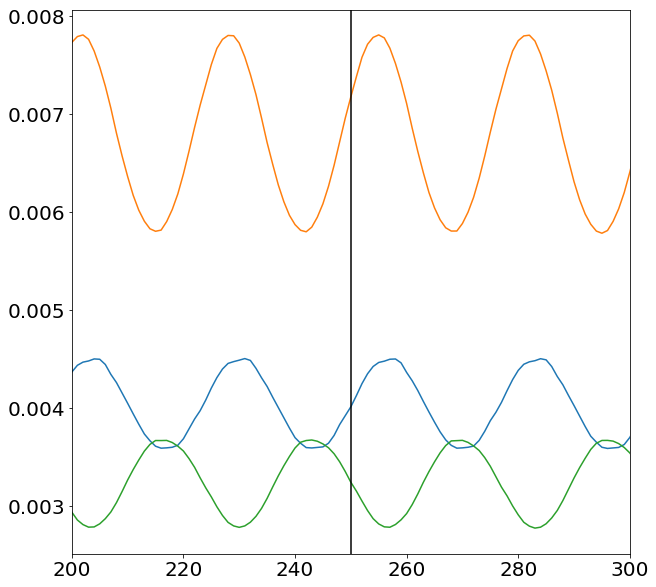

In [59]:
plt.figure(figsize=(10,10))

# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[:500])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[500:1000])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[1000:1500])

plt.plot(np.mean(X[20,1,:,:],axis=(1))[:500])
plt.plot(np.mean(X[20,1,:,:],axis=(1))[500:1000])
plt.plot(np.mean(X[20,1,:,:],axis=(1))[1000:1500])

plt.axvline(250,color='k')
plt.xlim(200,300)

(200, 300)

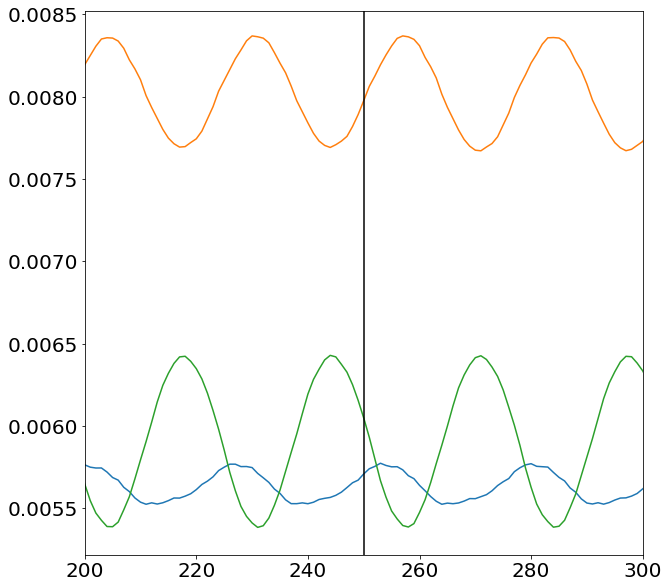

In [60]:
plt.figure(figsize=(10,10))

# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[:500])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[500:1000])
# plt.plot(np.mean(X[20,:,:,:],axis=(0,2))[1000:1500])

plt.plot(np.mean(X[20,3,:,:],axis=(1))[:500])
plt.plot(np.mean(X[20,3,:,:],axis=(1))[500:1000])
plt.plot(np.mean(X[20,3,:,:],axis=(1))[1000:1500])

plt.axvline(250,color='k')
plt.xlim(200,300)

In [20]:
response_files = [os.path.join(main_path, file) for file in os.listdir(main_path) if 'responses' in file]
bbb.sort_nicely(response_files)

responses = []
for file in response_files:
    responses.append(np.load(file))
responses = np.asarray(responses)
responses.shape

(49, 2000, 1500)

In [4]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file)

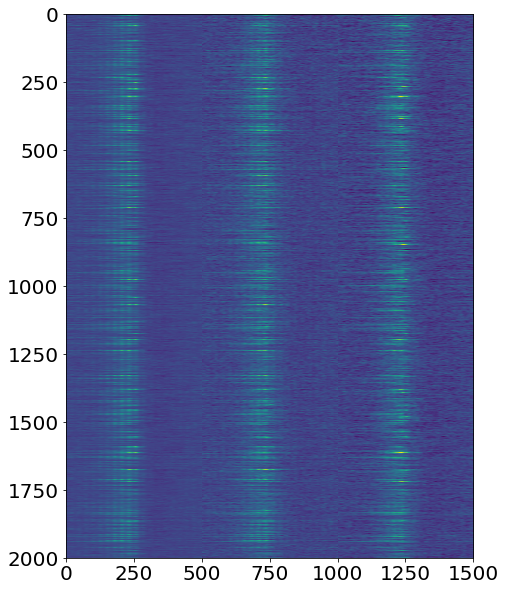

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(responses[20,:,:])

In [ ]:
np.sum(cluster_responses[cluster_num][:500])

In [16]:
z=20

In [ ]:
#RGB with turn, 

In [58]:
responses.shape

(49, 2000, 1500)

In [64]:
cluster_model_labels.shape

(49, 32768)

In [ ]:
# 

In [112]:
all_z = []
for z in range(49):
    colored_by_betas = np.zeros((256*128,1500))
    for cluster_num in range(n_clusters):
        cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
        colored_by_betas[cluster_indicies,:] = responses[z,cluster_num,:]
    colored_by_betas = colored_by_betas.reshape(256,128,1500)
    all_z.append(colored_by_betas)
all_z = np.asarray(all_z)

In [113]:
all_z.shape

(49, 256, 128, 1500)

In [102]:
all_z.shape

(49, 256, 128, 1500)

In [95]:
flat_z = np.reshape(np.moveaxis(all_z,0,2),(256*7,128*7,1500))

In [96]:
flat_z.shape

(1792, 896, 1500)

In [106]:
flat_z = np.zeros((128*7,256*7,1500))
flat_z.shape

(896, 1792, 1500)

In [114]:
all_z = np.swapaxes(all_z,1,2)
all_z.shape

(49, 128, 256, 1500)

In [115]:
flat_z = np.zeros((128*7,256*7,1500))

for z in range(49):
    x_start = z%7
    x_start = x_start * 256
    x_end = x_start + 256

    y_start = int(z/7)
    y_start = y_start * 128
    y_end = y_start + 128
    
    flat_z[y_start:y_end,x_start:x_end,:] = all_z[z,:,:,:]

128
128
128
128
128
128
128
256
256
256
256
256
256
256
384
384
384
384
384
384
384
512
512
512
512
512
512
512
640
640
640
640
640
640
640
768
768
768
768
768
768
768
896
896
896
896
896
896
896


In [119]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/flat_fiji"
nib.Nifti1Image(flat_z, np.eye(4)).to_filename(save_file)

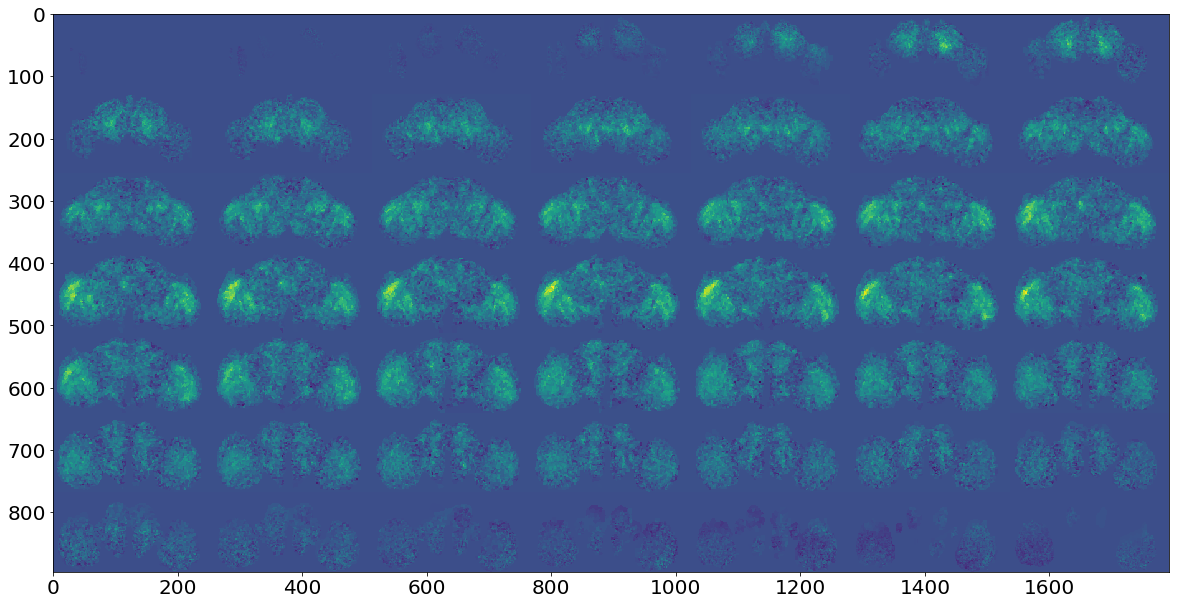

In [140]:
plt.figure(figsize=(20,20))
plt.imshow(flat_z[:,:,650])

In [87]:
flat_z = np.zeros((256*7,128*7,1500))
for z in range(49):
    flat_z[]

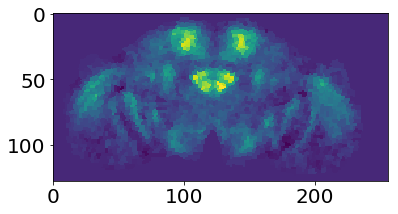

In [105]:
plt.imshow(all_z[20,:,:,250])

In [72]:
colored_by_betas = np.zeros((49,256*128))
for cluster_num in range(n_clusters):
    colored_by_betas[np.where(cluster_model_labels==0)] = responses[:,cluster_num,250]

ValueError: shape mismatch: value array of shape (49,) could not be broadcast to indexing result of shape (210,)

In [76]:
np.shape(np.where(cluster_model_labels==0))

(2, 210)

In [77]:
np.where(cluster_model_labels==0)

(array([ 0,  1,  2,  3,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9,
        10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14,
        14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18,
        18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22,
        22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26,
        27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31,
        31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35,
        35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39,
        39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43,
        44, 44, 45, 46, 47, 48]),
 array([ 3510,  3512,  3527, 10406, 17310, 27871, 2787

In [69]:
test = colored_by_betas.reshape(49,256,128)

In [73]:
responses[:,cluster_num,250].shape

(49,)

In [62]:
np.max(cluster_model_labels)

1999

In [63]:
cluster_model_labels

array([[1409, 1409, 1409, ..., 1384, 1400, 1400],
       [1979, 1979, 1979, ..., 1979, 1979, 1979],
       [1880, 1880, 1880, ..., 1880, 1880, 1880],
       ...,
       [1995, 1995, 1995, ..., 1995, 1995, 1995],
       [1790, 1790, 1790, ..., 1790, 1790, 1790],
       [1568, 1568, 1568, ..., 1568, 1568, 1568]])

In [61]:
t0 = time.time()
all_beh = []
for beh in range(3)[::-1]:
    all_z = []
    for z in range(49):
        colored_by_betas = np.zeros(256*128)
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
            colored_by_betas[cluster_indicies] = np.sum(responses[z,cluster_num,500*beh:500*(beh+1)])
        colored_by_betas = colored_by_betas.reshape(256,128)
        all_z.append(colored_by_betas)
    all_z = np.asarray(all_z)
    all_beh.append(all_z)
all_beh = np.asarray(all_beh)
print(time.time()-t0)

6.334040641784668


In [39]:
all_beh = np.moveaxis(all_beh,0,-1)
all_beh = np.moveaxis(all_beh,1,2)

In [40]:
all_beh = all_beh/np.max(all_beh)

In [41]:
all_beh.shape

(49, 128, 256, 3)

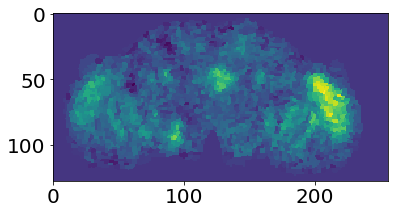

In [21]:
plt.imshow(colored_by_betas.T)

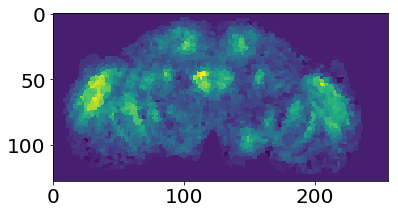

In [23]:
plt.imshow(colored_by_betas.T)

In [ ]:
norm_min = 0
norm_max = np.max(np.nan_to_num(map_z_neg))
z=18
slices = []
for z in range(49):
    colors1 = Normalize(norm_min, norm_max)(map_z_neg[z,:,:].T)
    colors2 = Normalize(norm_min, norm_max)(map_z_pos[z,:,:].T)
    colors3 = Normalize(norm_min, norm_max)(map_y_pos[z,:,:].T)

    empty = np.zeros(colors1.shape)
    to_plot = np.stack((colors1,colors2,colors3),axis=2)
    slices.append(to_plot)

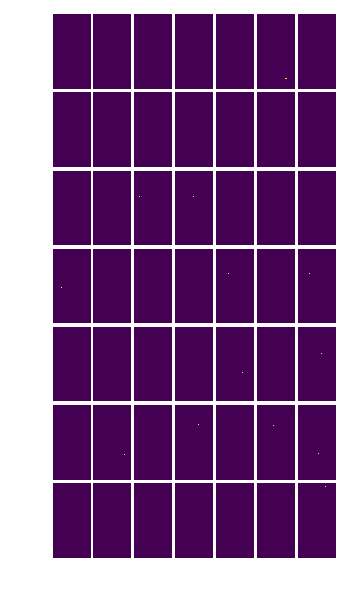

In [71]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(7, 7), axes_pad=.05)
for i in range(49):
    #grid[i].imshow(all_beh[i,:,:,:]);
    grid[i].imshow(test[i,:,:]);
    grid[i].axis('off')
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

# Check fft of behavior for laser signal

In [63]:
class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = bbb.load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def load_z_depth_correction (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', '20201220_warped_z_depth.nii')
        self.z_correction = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model_labels, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)

            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1

            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)

            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

In [73]:
fly_dir = os.path.join(dataset_path, 'fly_087', 'func_0')
fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
fictrac_unsmoothed = np.asarray(fictrac_raw['dRotLabY'])
fictrac_smoothed = scipy.signal.savgol_filter(fictrac_unsmoothed,25,3)


~~ load_fictrac ~~
load_fictrac done. Duration: 2.86 sec


(60000, 65000)

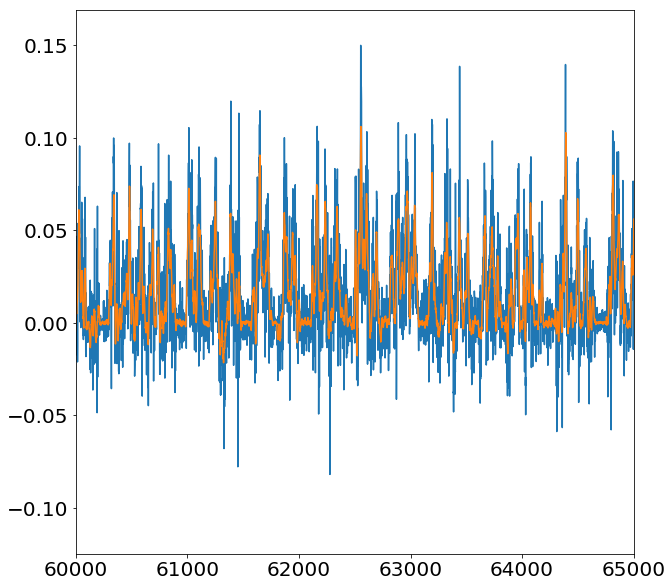

In [76]:
plt.figure(figsize=(10,10))
plt.plot(fictrac_unsmoothed)
plt.plot(fictrac_smoothed)
plt.xlim(60000,65000)

In [68]:
def fft_signal(signal, sampling_rate, duration):
    """ Performs FFT on a signal.
    Parameters
    ----------
    signal: 1D numpy array
    sampling_rate: in Hz (I think... check)
    duration: int (in sec?). Can probably calulate this instead of requiring.
    Returns
    -------
    y: signal
    Y: fft
    t: times """
    
    Fs = sampling_rate
    y = signal
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,duration,Ts) # time vector
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return Y,y,t

In [65]:
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [ ]:
# fps = 50
# dur = 1000 * 30 * 60
# camera_rate = 1/fps * 1000 # camera frame rate in ms
# raw_fictrac_times = np.arange(0,dur,camera_rate)

In [368]:
fly_names = ['fly_087']
flies = {}
for i, fly in enumerate(fly_names):
    flies[fly] = Fly(fly_name=fly, fly_idx=i)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 1.31 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.01 sec


In [149]:
flies['fly_087'].fictrac.fictrac['Yh'].shape

(180000,)

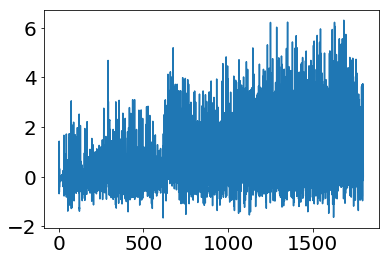

In [171]:
plt.plot(high_res_timepoints/1000,flies['fly_087'].fictrac.fictrac['Yh'])

In [153]:
Y,y,t=fft_signal(signal=flies['fly_087'].fictrac.fictrac['Yh'],
           sampling_rate=100,
           duration=1800)

(0.0, 6000.0, 0.0, 0.1)

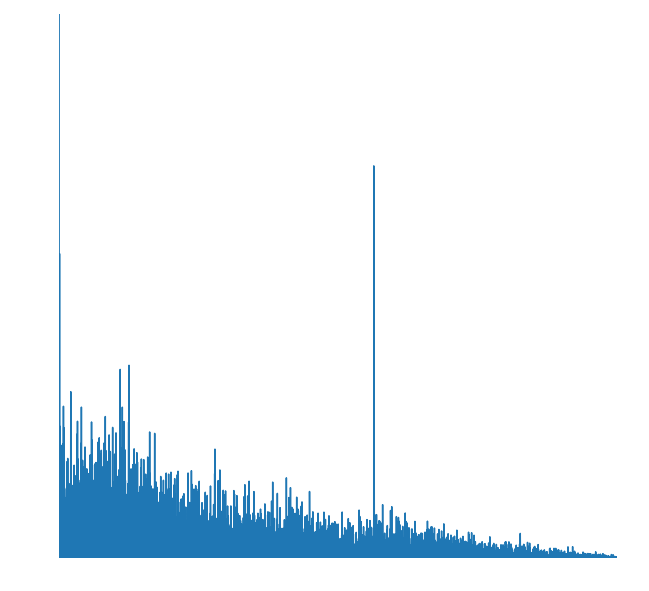

In [165]:
plt.figure(figsize=(10,10))
plt.plot(Y)
plt.ylim(0,.1)
plt.xlim(0,6000)
plt.axis('off')

In [160]:
t.shape

(180000,)

In [167]:
from scipy.fftpack import fft, ifft

In [ ]:
"""
Simulate a sinusoidal signal with given sampling rate
"""


f = 10 #frequency = 10 Hz
overSampRate = 30 #oversammpling rate
fs = f*overSampRate #sampling frequency
phase = 1/3*np.pi #phase shift in radians
nCyl = 5 # desired number of cycles of the sine wave

(t,x) = sine_wave(f,overSampRate,phase,nCyl) #function call

plt.plot(t,x) # plot using pyplot library from matplotlib package
plt.title('Sine wave f='+str(f)+' Hz') # plot title
plt.xlabel('Time (s)') # x-axis label
plt.ylabel('Amplitude') # y-axis label
plt.show() # display the figure

In [370]:
from scipy.fftpack import fft,fftshift

In [172]:
fs = 100
x = flies['fly_087'].fictrac.fictrac['Yh']

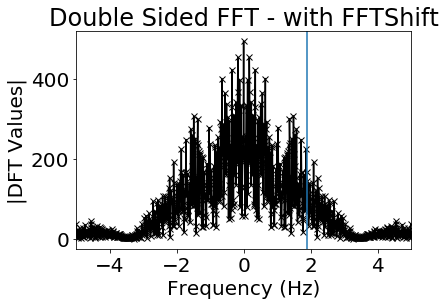

In [201]:
NFFT=10000#1024     
X=fftshift(fft(x,NFFT))
##plt.figure(figsize=(10,10))
fig4, ax = plt.subplots(nrows=1, ncols=1) #create figure handle

fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
ax.plot(fVals,np.abs(X),'k',marker='x')
ax.set_title('Double Sided FFT - with FFTShift')
ax.set_xlabel('Frequency (Hz)')         
ax.set_ylabel('|DFT Values|')
ax.set_xlim(-50,50)
#ax.set_xticks(np.arange(-50, 50+10,10))
#fig4.show()
plt.xlim(-5,5)
plt.axvline(1/0.531995701)

In [187]:
flies['fly_087'].timestamps.shape

(3384, 49)

In [191]:
flies['fly_087'].timestamps[:,20]-flies['fly_087'].timestamps[0,20]

array([0.00000000e+00, 5.31995701e+02, 1.06399140e+03, ...,
       1.79867747e+06, 1.79920946e+06, 1.79974146e+06])

1.8797144377676087

In [194]:
30*60*2

3600

In [202]:
x.shape

(180000,)

In [276]:
flies['fly_087'].fictrac.fictrac['Yh'].shape

(180000,)

In [277]:
30*60*1000

1800000

In [293]:
fs = 100
x = flies['fly_087'].fictrac.fictrac['Yh']
f, t, Sxx = scipy.signal.spectrogram(x, fs)

In [295]:
fs = 50
x = fictrac_smoothed
f, t, Sxx = scipy.signal.spectrogram(x, fs)

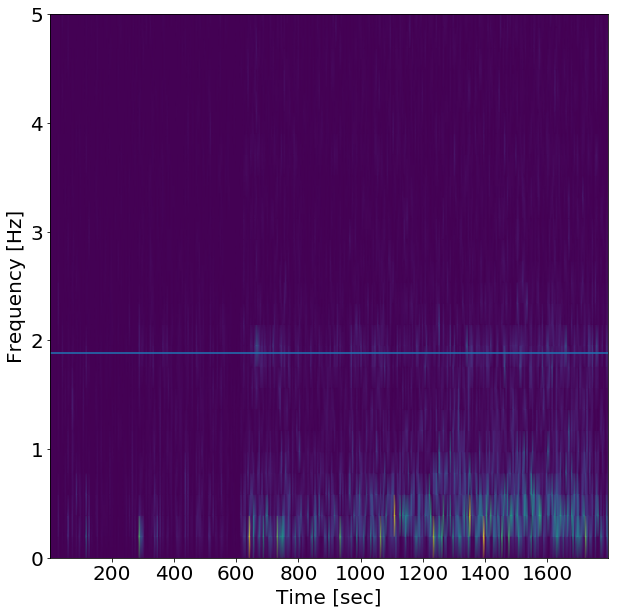

In [296]:
plt.figure(figsize=(10,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,5)
plt.axhline(1/0.531995701)
#plt.axhline(.5/0.531995701)

In [210]:
flies['fly_087'].timestamps[:,20].shape

(3384,)

In [213]:
 flies['fly_087'].fictrac.fictrac['Yh'].shape

(180000,)

In [214]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/master_X.npy"
X = np.load(file)

In [215]:
X.shape

(49, 10, 1500, 3384)

In [219]:
out = np.mean(X[20,0,:,:],axis=-1)

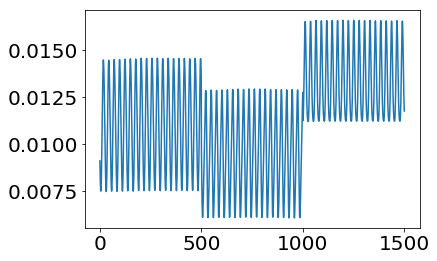

In [220]:
plt.plot(out)

In [ ]:
flies['fly_087'].timestamps[:,20] # in ms

In [429]:
time_shifts = list(range(-5000,5000,20)) # in ms

In [240]:
len(time_shifts)

500

In [231]:
pull_at = time_shifts+flies['fly_087'].timestamps[1000:2000,20]

ValueError: operands could not be broadcast together with shapes (500,) (1000,) 

In [232]:
flies['fly_087'].timestamps[1000:2000,20].shape

(1000,)

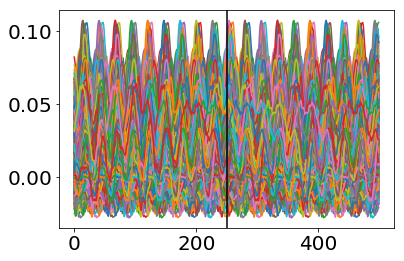

In [448]:
saved = []
for i in range(3384):
    pull_at = time_shifts+flies['fly_087'].timestamps[i,20]
    to_plot = flies['fly_087'].fictrac.fictrac['Yi'](pull_at)
    saved.append(to_plot)
    plt.plot(to_plot)
plt.axvline(250,color='k')

In [457]:
np.shape(saved)

(3384, 500)

In [460]:
corruption = np.mean(np.nan_to_num(saved),axis=0)

In [461]:
corruption.shape

(500,)

In [463]:
corrected = saved-corruption

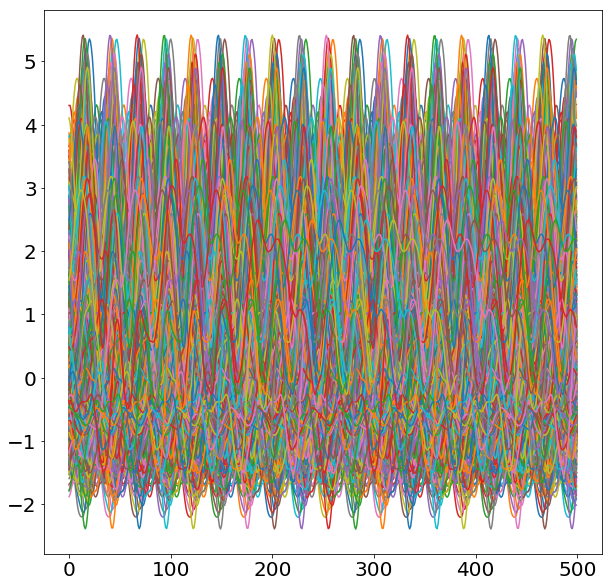

In [466]:
plt.figure(figsize=(10,10))
plt.plot(corrected.T);

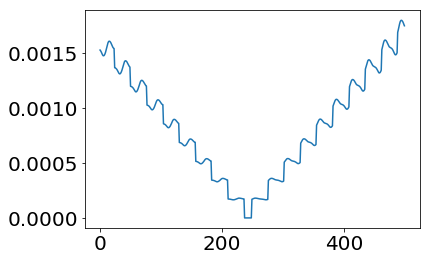

In [469]:
plt.plot(np.mean(np.nan_to_num(corrected),axis=0))

In [464]:
corrected.shape

(3384, 500)

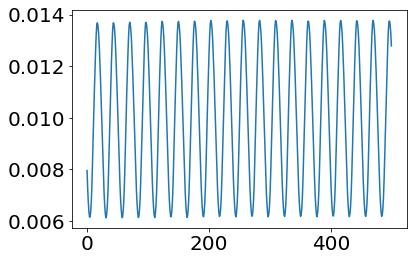

In [454]:
plt.plot(np.mean(np.nan_to_num(saved),axis=0))

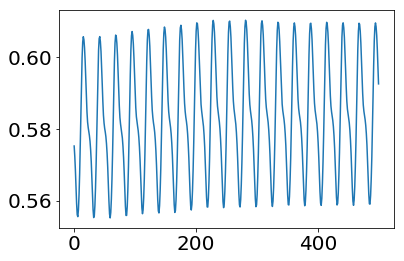

In [456]:
plt.plot(np.mean(np.nan_to_num(saved),axis=0))

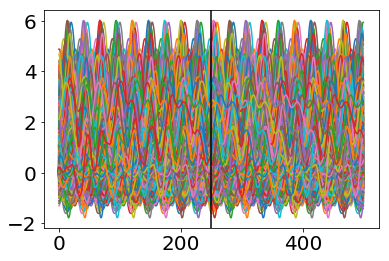

In [455]:
saved = []
for i in range(3384):
    pull_at = time_shifts+flies['fly_087'].timestamps[i,20]
    to_plot = fictrac_interp_object(pull_at)
    saved.append(to_plot)
    plt.plot(to_plot)
plt.axvline(250,color='k')

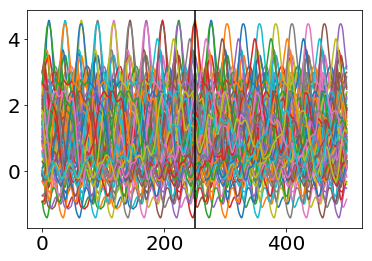

In [438]:
saved = []
for i in range(100):
    pull_at = time_shifts+flies['fly_087'].timestamps[2000+i,48]
    to_plot = fictrac_interp_object(pull_at)
    saved.append(to_plot)
    plt.plot(to_plot)
plt.axvline(250,color='k')

In [434]:
# Create camera timepoints
fps=100
camera_rate = 1/fps * 1000 # camera frame rate in ms
expt_len = 1000*30*60
x_original = np.arange(0,expt_len,camera_rate)

# Smooth raw fictrac data
#fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)
fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(bandcut),25,3)

# Create interp object with camera timepoints
fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)

In [433]:
fictrac_smoothed.shape

(180000,)

In [432]:
x_original.shape

(90000,)

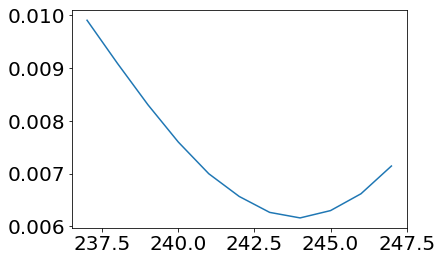

In [447]:
plt.plot(np.mean(np.asarray(saved),axis=0))
#plt.axvline(250,color='k')

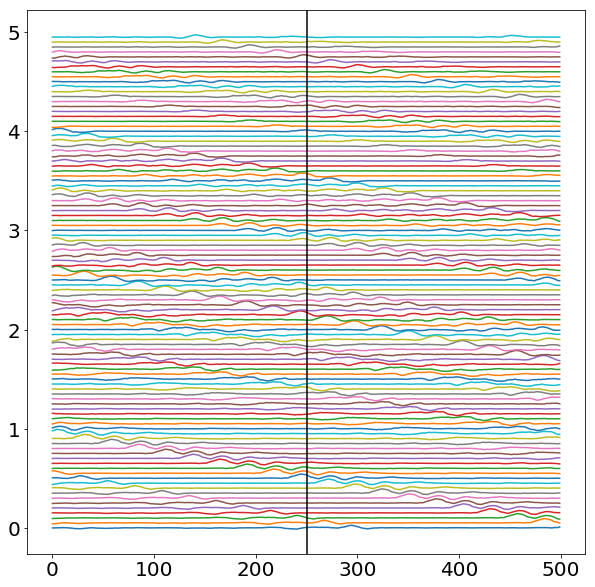

In [262]:
plt.figure(figsize=(10,10))
saved = []
for i in range(100):
    pull_at = time_shifts+flies['fly_087'].timestamps[1000+i,48]
    to_plot = flies['fly_087'].fictrac.fictrac['Yi'](pull_at)
    saved.append(to_plot)
    plt.plot(to_plot+.05*i)
plt.axvline(250,color='k')

In [228]:
60*30*1000

1800000

In [273]:
flies['fly_087'].fictrac.fictrac['Yh'].shape

(180000,)

(75000, 77000)

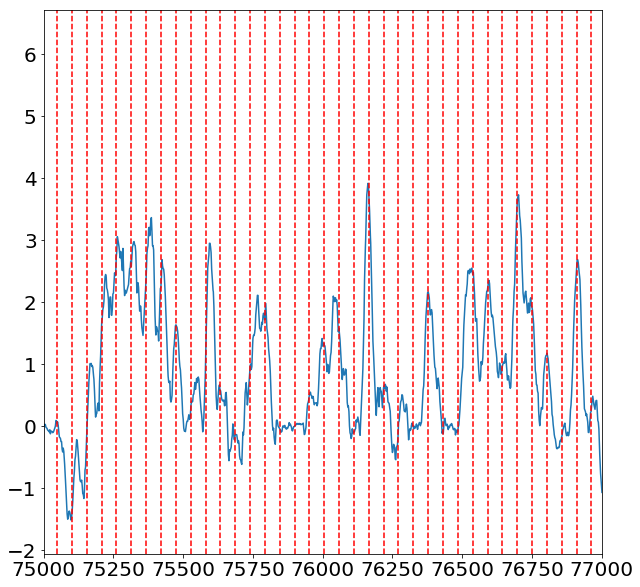

In [271]:
plt.figure(figsize=(10,10))
plt.plot(flies['fly_087'].fictrac.fictrac['Yh'])
for i in range(1000,2000):
    plt.axvline(flies['fly_087'].timestamps[i,30]/10,color='r',linestyle='--')
plt.xlim(75000,77000)

In [280]:
flies['fly_087'].timestamps[-1,30]/10

180010.7748605

In [300]:
from scipy import fftpack

In [336]:
fictrac_smoothed.shape

(90000,)

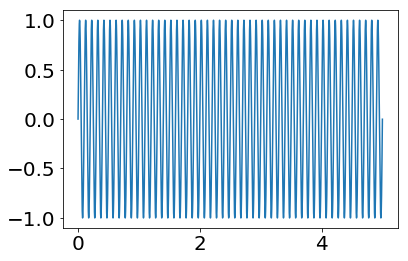

In [329]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(10, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [332]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

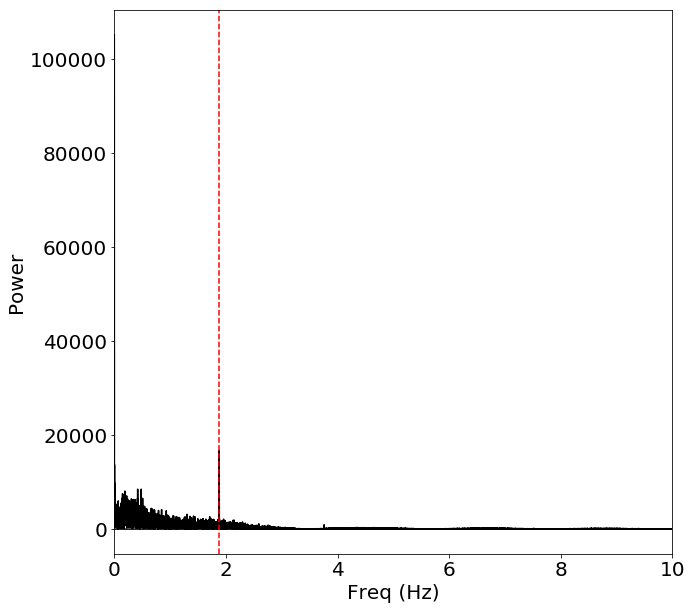

In [347]:
SAMPLE_RATE = 100
DURATION = 1800

N = SAMPLE_RATE * DURATION

yf = fft(flies['fly_087'].fictrac.fictrac['Yh'])
xf = scipy.fftpack.fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,10))
plt.plot(xf, np.abs(yf),color='k')
plt.xlim(0,10)
plt.axvline(1/0.531995701,color='r',linestyle='--')
plt.ylabel('Power')
plt.xlabel('Freq (Hz)')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

(1.86, 1.9)

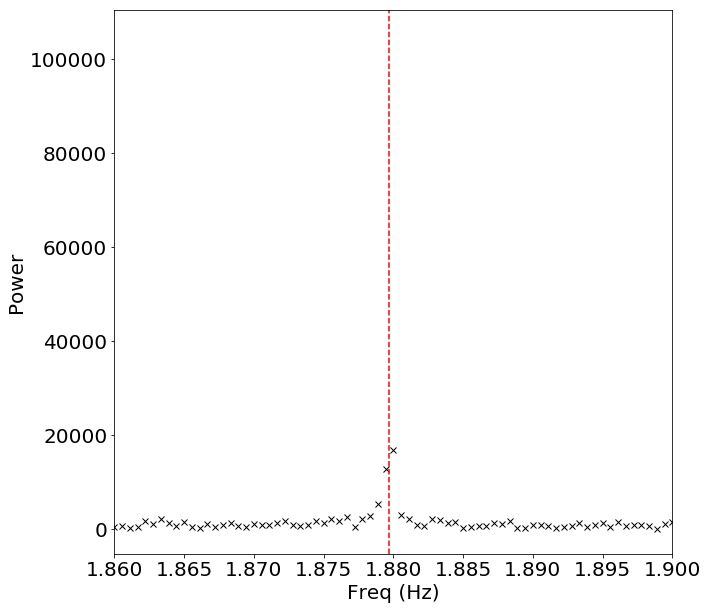

In [413]:
SAMPLE_RATE = 100
DURATION = 1800

N = SAMPLE_RATE * DURATION

yf = fft(flies['fly_087'].fictrac.fictrac['Yh'])
xf = scipy.fftpack.fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,10))
plt.plot(xf, np.abs(yf),'x',color='k')
plt.xlim(0,10)
plt.axvline(1/0.531995701,color='r',linestyle='--')
plt.ylabel('Power')
plt.xlabel('Freq (Hz)')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

plt.xlim(1.86,1.9)

In [407]:
np.argmax(yf[1:176615])

3383

In [ ]:
peak1 = 176616
peak2 = 3384

(3360, 3400)

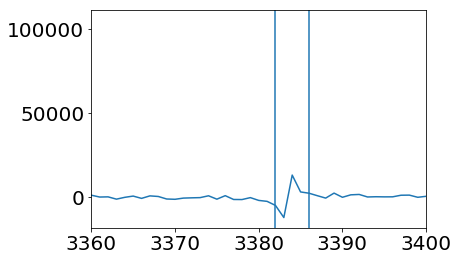

In [417]:
plt.plot(yf)
plt.axvline(3382)
plt.axvline(3386)
plt.xlim(3360,3400)

In [422]:
yf_bandcut = yf.copy()
yf_bandcut[3382:3386] = 0
yf_bandcut[176614:176618] = 0

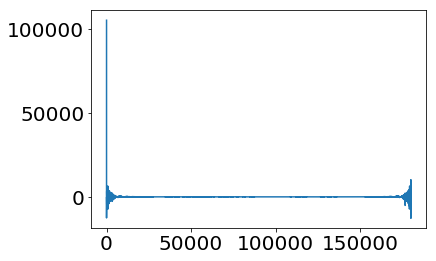

In [423]:
plt.plot(yf_bandcut)

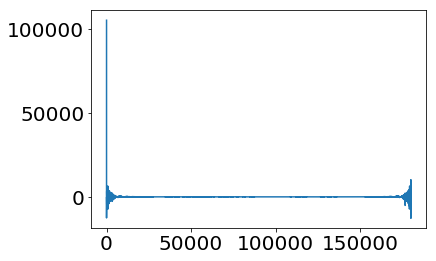

In [426]:
plt.plot(fft(bandcut))

In [424]:
original = ifft(yf)
bandcut = ifft(yf_bandcut)

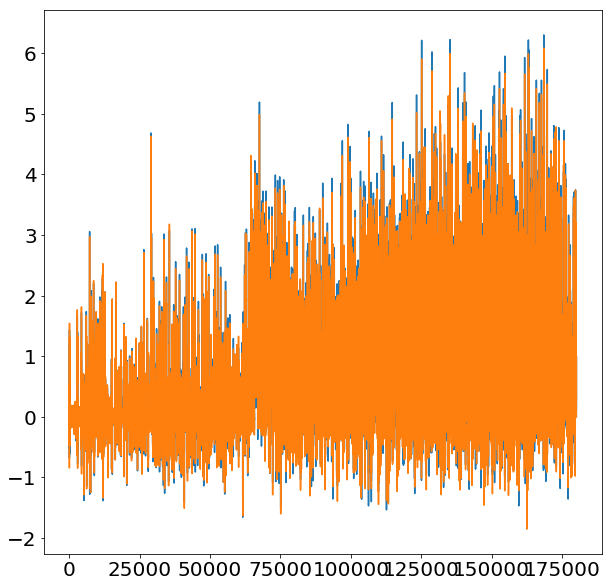

In [427]:
plt.figure(figsize=(10,10))
plt.plot(original)
plt.plot(bandcut)
plt.xlim(100000,110000)

In [387]:
len(out)

180000

In [381]:
out = np.fft.fft(flies['fly_087'].fictrac.fictrac['Yh'])

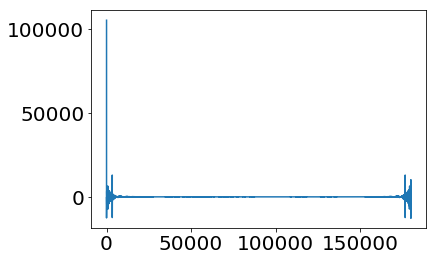

In [382]:
plt.plot(out)

In [ ]:
# current best plan:
# correct existing master X behavior matrix by subtracting out the mean of each fly and each slice

In [470]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/master_X.npy"
X = np.load(file)

In [471]:
X.shape

(49, 10, 1500, 3384)

In [473]:
np.mean(X[20,0,:,:],axis=1).shape

(1500,)

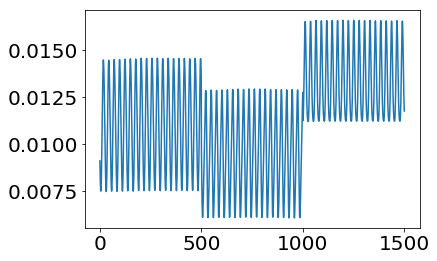

In [474]:
plt.plot(np.mean(X[20,0,:,:],axis=1))

In [479]:
corrected = np.subtract(X[20,0,:,:], np.mean(X[20,0,:,:],axis=1)[:,np.newaxis])

In [480]:
corrected.shape

(1500, 3384)

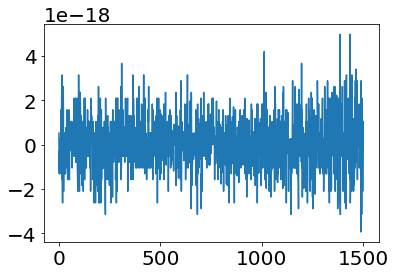

In [481]:
plt.plot(np.mean(corrected,axis=1))

In [482]:
X.shape

(49, 10, 1500, 3384)

In [483]:
X_corrected = X - np.mean(X,axis=-1)[:,:,:,np.newaxis]

In [484]:
X_corrected.shape

(49, 10, 1500, 3384)

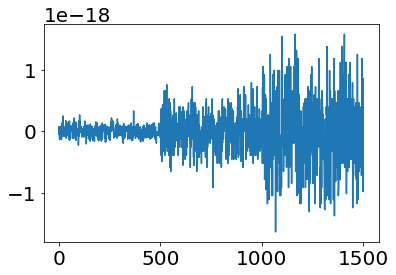

In [486]:
plt.plot(np.mean(X_corrected[10,4,:,:],axis=1))

In [487]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/master_X_corrected.npy"
np.save(save_file, X_corrected)

In [488]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/corrected"
os.mkdir(file)

# .

In [502]:
out = np.fft.fft(corrupted[:500])

In [506]:
out[15:23] = 0
out[475:485] = 0

(460, 500)

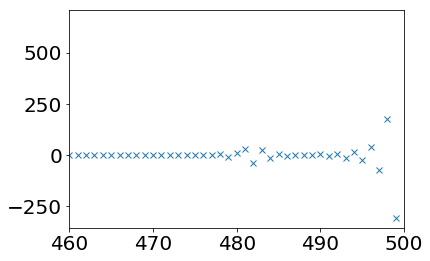

In [505]:
plt.plot(out,'x')
plt.xlim(460,500)

In [ ]:
plt.plot(ifft(out))

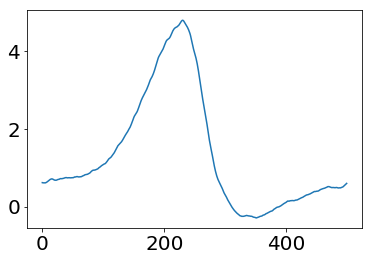

In [515]:
plt.plot(ifft(out))

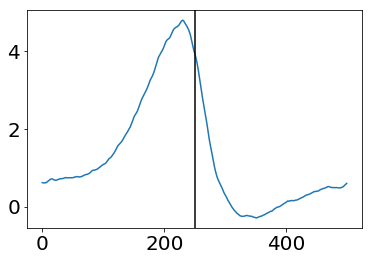

In [508]:
plt.plot(ifft(out))
plt.axvline(250,color='k')

In [ ]:
os.listdir(os.path.joinmain_path)

In [509]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/corrected/responses_20.npy"
temp = np.load(file)

In [510]:
temp.shape

(2000, 1500)

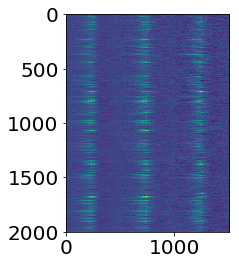

In [511]:
plt.imshow(temp)

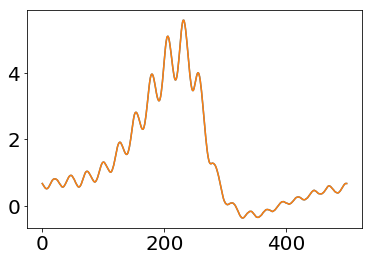

In [514]:
plt.plot(np.mean(temp,axis=0)[:500])
plt.plot(corrupted[:500])